In [4]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, os
import seaborn as sns
from sklearn.metrics import classification_report as CR, confusion_matrix as CM, accuracy_score as AS 
from sklearn.model_selection import train_test_split as tt, KFold as KF, cross_val_score as CVS, GridSearchCV as GSCV
from sklearn.preprocessing import StandardScaler as SS,LabelEncoder as LE
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgbc
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df=pd.read_csv('C:\\Users\\Downloads\\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data=df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.shape

(569, 32)

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [14]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
data['diagnosis']=data['diagnosis'].astype('category')
data.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [16]:
data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [17]:
data.head(9)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [18]:
x=data.drop(labels='diagnosis',axis='columns')
y=data['diagnosis']

In [19]:
x.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y.head(6)

0    M
1    M
2    M
3    M
4    M
5    M
Name: diagnosis, dtype: category
Categories (2, object): ['B', 'M']

In [22]:
list(x)

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [25]:
x.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
mean_x=x.mean()

In [29]:
x.std().head(8)

id                  1.250206e+08
radius_mean         3.524049e+00
texture_mean        4.301036e+00
perimeter_mean      2.429898e+01
area_mean           3.519141e+02
smoothness_mean     1.406413e-02
compactness_mean    5.281276e-02
concavity_mean      7.971981e-02
dtype: float64

In [30]:
data_norm=(x-mean_x)/(x.max()-x.min())
data_norm

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,0.324113,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,0.310239,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,0.259723,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,-0.048353,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,0.223081,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.032311,0.351778,0.104848,0.345733,0.349570,0.132163,0.035455,0.363404,0.447221,-0.043242,...,0.326603,0.019264,0.293036,0.281758,0.056999,-0.041685,0.110632,0.367676,-0.165731,-0.083929
565,-0.032311,0.284098,0.303022,0.271101,0.257099,0.012997,-0.002886,0.129336,0.243493,-0.030110,...,0.263992,0.335095,0.237755,0.209009,-0.104131,-0.060216,0.039386,0.165614,-0.064805,-0.115281
566,-0.032310,0.117029,0.297273,0.112853,0.086198,-0.106620,-0.006260,0.008694,0.020382,-0.111929,...,0.096436,0.225021,0.096812,0.059825,-0.121961,0.053492,0.054402,0.093449,-0.134586,-0.037687
567,-0.032310,0.306342,0.339545,0.332603,0.258796,0.193552,0.529596,0.615278,0.512330,0.295647,...,0.336920,0.366279,0.385173,0.231129,0.215488,0.595546,0.532357,0.516817,0.233835,0.262719


In [32]:
data_norm=pd.concat([data_norm,y],axis='columns')
data_norm.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


In [36]:
corr1=data.drop('diagnosis',axis=1).drop('id',axis=1).corr()

<AxesSubplot:>

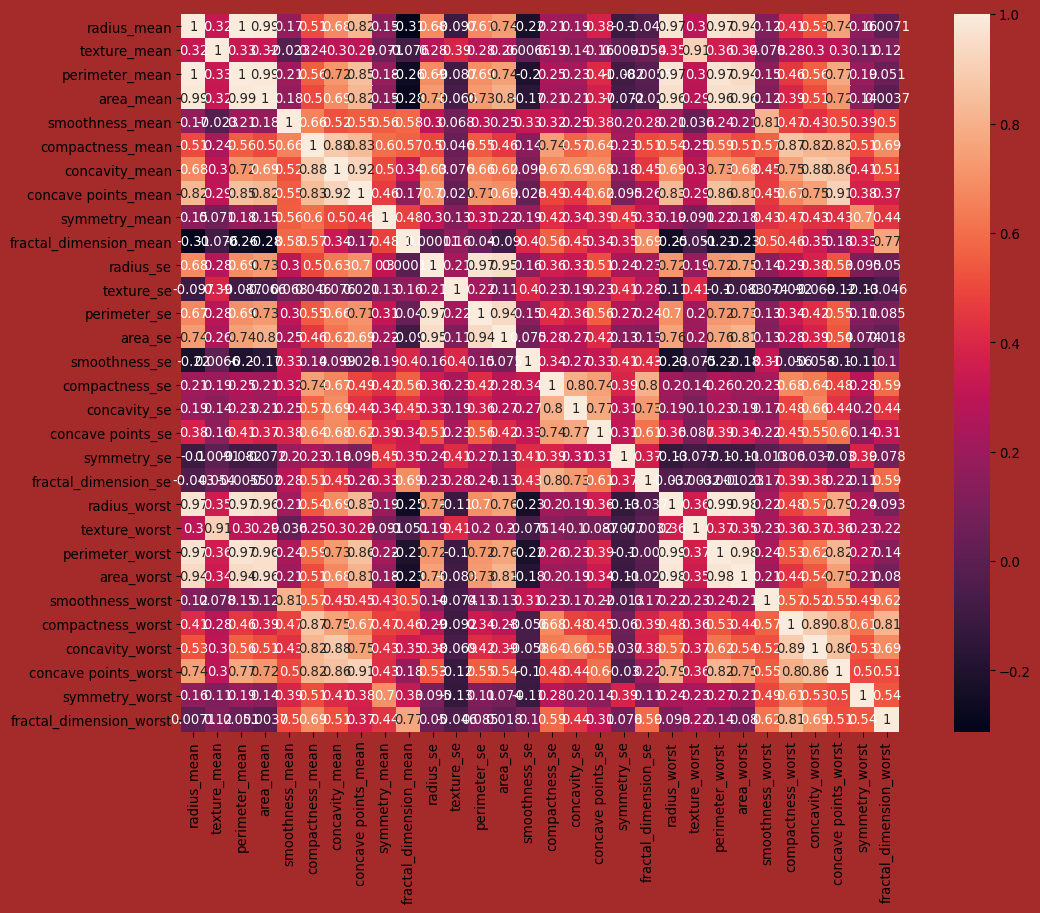

In [37]:
plt.figure(figsize=(15,10),dpi=95,facecolor='brown')
sns.heatmap(corr1,annot=True,square=True)

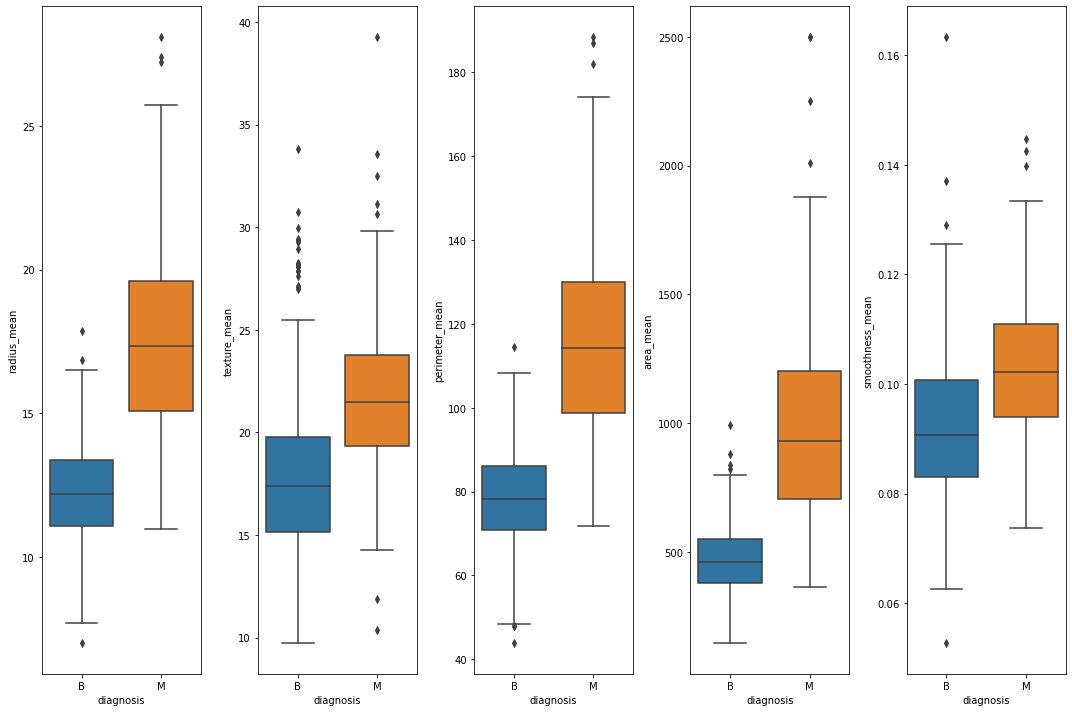

In [39]:
plt.rcParams['figure.figsize']=(15,10)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='radius_mean',data=data,ax=ax1)
sns.boxplot(x='diagnosis',y='texture_mean',data=data,ax=ax2)
sns.boxplot(x='diagnosis',y='perimeter_mean',data=data,ax=ax3)
sns.boxplot(x='diagnosis',y='area_mean',data=data,ax=ax4)
sns.boxplot(x='diagnosis',y='smoothness_mean',data=data,ax=ax5)
f.tight_layout()

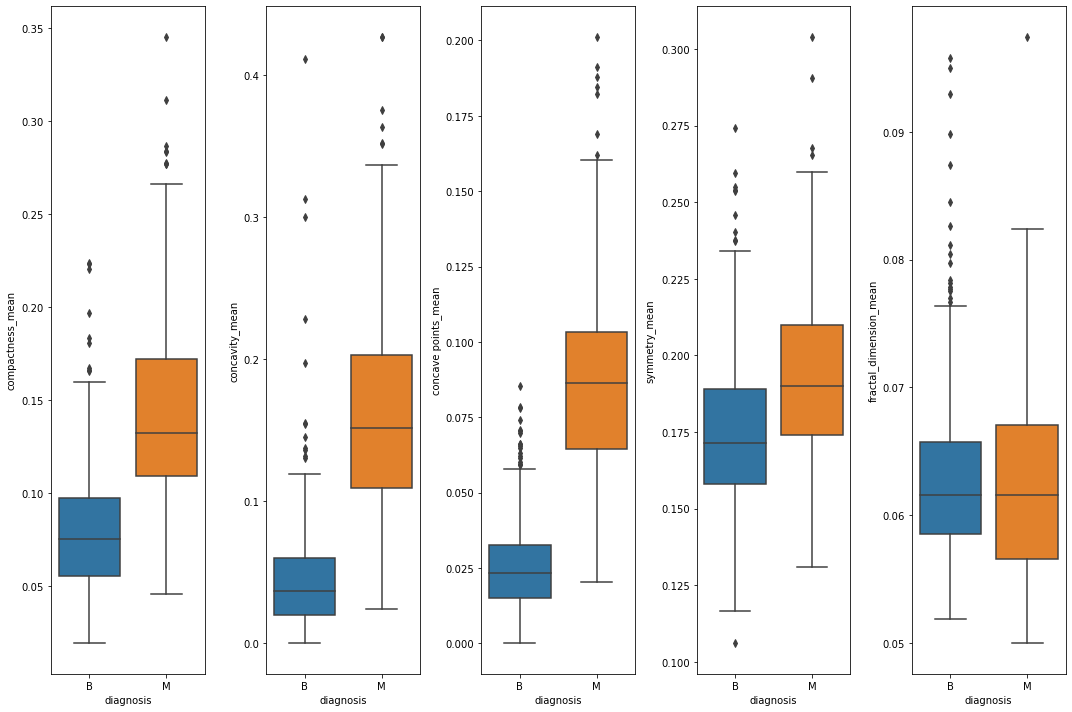

In [40]:
#compactness_mean
#concavity_mean
#concave points_mean
#symmetry_mean
#fractal_dimension_mean
f,(ax100,ax200,ax300,ax400,ax500)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='compactness_mean',data=data,ax=ax100)
sns.boxplot(x='diagnosis',y='concavity_mean',data=data,ax=ax200)
sns.boxplot(x='diagnosis',y='concave points_mean',data=data,ax=ax300)
sns.boxplot(x='diagnosis',y='symmetry_mean',data=data,ax=ax400)
sns.boxplot(x='diagnosis',y='fractal_dimension_mean',data=data,ax=ax500)
f.tight_layout()


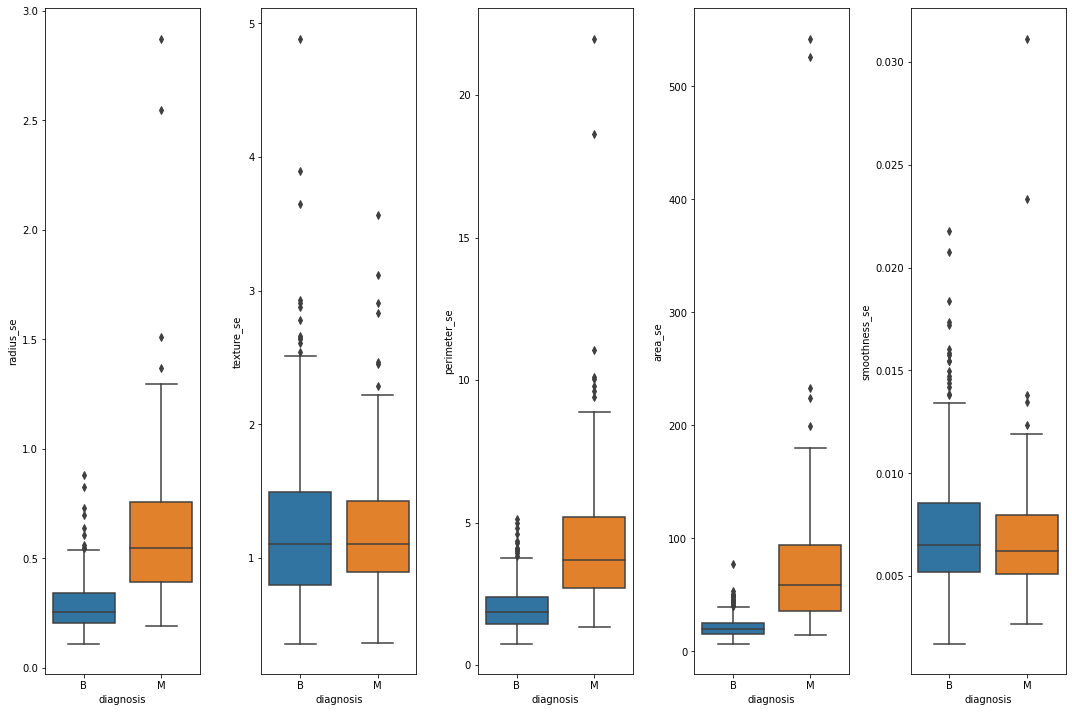

In [46]:
f,(ax10,ax20,ax30,ax40,ax50)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='radius_se',data=data,ax=ax10)
sns.boxplot(x='diagnosis',y='texture_se',data=data,ax=ax20)
sns.boxplot(x='diagnosis',y='perimeter_se',data=data,ax=ax30)
sns.boxplot(x='diagnosis',y='area_se',data=data,ax=ax40)
sns.boxplot(x='diagnosis',y='smoothness_se',data=data,ax=ax50)
f.tight_layout()

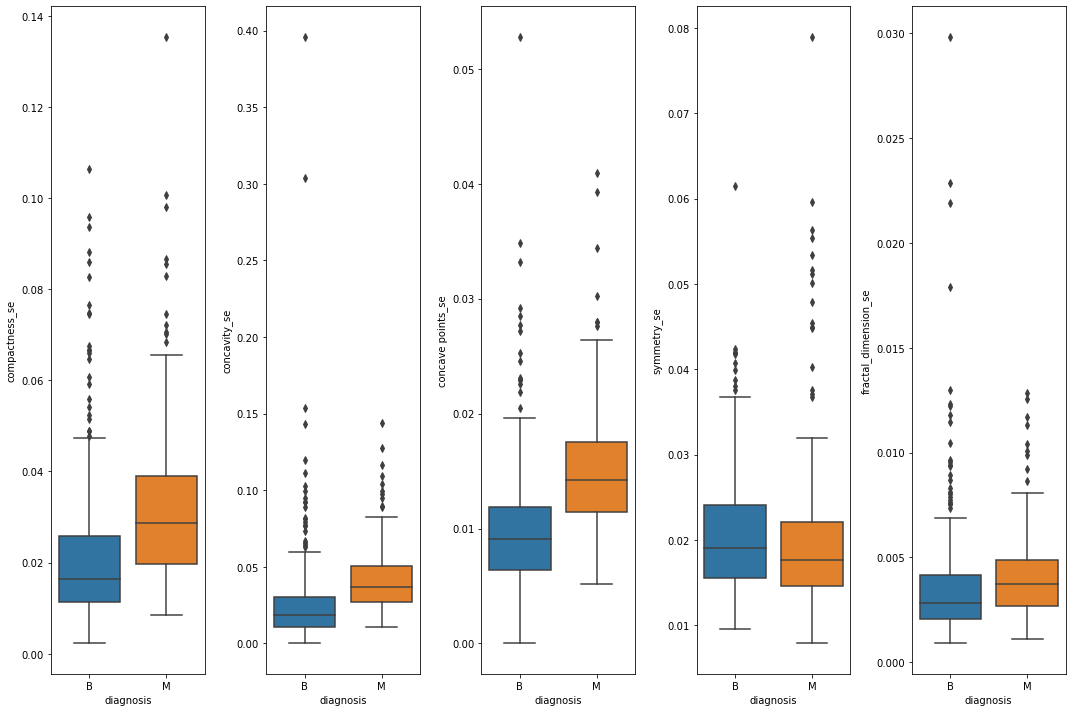

In [49]:
f,(ax60,ax70,ax80,ax90,ax100)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='compactness_se',data=data,ax=ax60)
sns.boxplot(x='diagnosis',y='concavity_se',data=data,ax=ax70)
sns.boxplot(x='diagnosis',y='concave points_se',data=data,ax=ax80)
sns.boxplot(x='diagnosis',y='symmetry_se',data=data,ax=ax90)
sns.boxplot(x='diagnosis',y='fractal_dimension_se',data=data,ax=ax100)
f.tight_layout()

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_worst'>

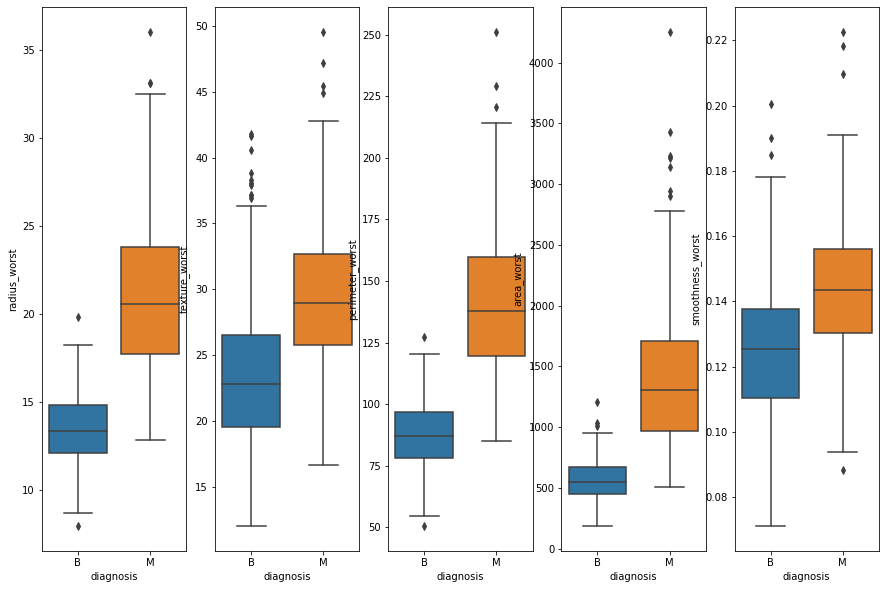

In [50]:
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='radius_worst',data=data,ax=ax1)
sns.boxplot(x='diagnosis',y='texture_worst',data=data,ax=ax2)
sns.boxplot(x='diagnosis',y='perimeter_worst',data=data,ax=ax3)
sns.boxplot(x='diagnosis',y='area_worst',data=data,ax=ax4)
sns.boxplot(x='diagnosis',y='smoothness_worst',data=data,ax=ax5)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_worst'>

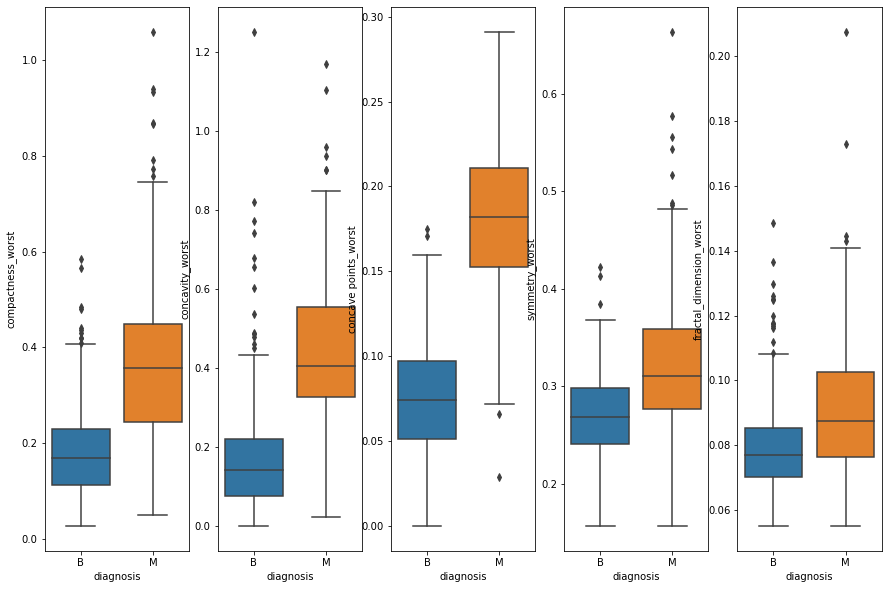

In [51]:
f,(ax1k,ax2k,ax3k,ax4k,ax5k)=plt.subplots(1,5)
sns.boxplot(x='diagnosis',y='compactness_worst',data=data,ax=ax1k)
sns.boxplot(x='diagnosis',y='concavity_worst',data=data,ax=ax2k)
sns.boxplot(x='diagnosis',y='concave points_worst',data=data,ax=ax3k)
sns.boxplot(x='diagnosis',y='symmetry_worst',data=data,ax=ax4k)
sns.boxplot(x='diagnosis',y='fractal_dimension_worst',data=data,ax=ax5k)

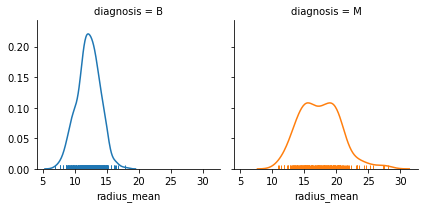

In [54]:
gb=sns.FacetGrid(data=data,col='diagnosis',hue='diagnosis')
gb.map(sns.distplot,'radius_mean',hist=False,rug=True)

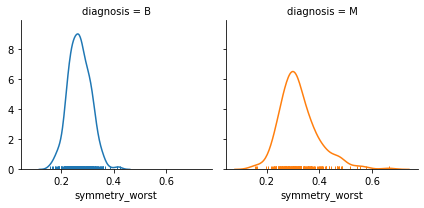

In [61]:
gb=sns.FacetGrid(data,hue='diagnosis',col='diagnosis')
gb.map(sns.distplot,'symmetry_worst',hist=False,rug=True)

In [66]:
x_norm=data_norm.drop(labels='diagnosis',axis=1)
y_norm=data_norm['diagnosis']
display(x_norm)
display(y_norm)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,0.324113,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,0.310239,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,0.259723,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,-0.048353,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,0.223081,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.032311,0.351778,0.104848,0.345733,0.349570,0.132163,0.035455,0.363404,0.447221,-0.043242,...,0.326603,0.019264,0.293036,0.281758,0.056999,-0.041685,0.110632,0.367676,-0.165731,-0.083929
565,-0.032311,0.284098,0.303022,0.271101,0.257099,0.012997,-0.002886,0.129336,0.243493,-0.030110,...,0.263992,0.335095,0.237755,0.209009,-0.104131,-0.060216,0.039386,0.165614,-0.064805,-0.115281
566,-0.032310,0.117029,0.297273,0.112853,0.086198,-0.106620,-0.006260,0.008694,0.020382,-0.111929,...,0.096436,0.225021,0.096812,0.059825,-0.121961,0.053492,0.054402,0.093449,-0.134586,-0.037687
567,-0.032310,0.306342,0.339545,0.332603,0.258796,0.193552,0.529596,0.615278,0.512330,0.295647,...,0.336920,0.366279,0.385173,0.231129,0.215488,0.595546,0.532357,0.516817,0.233835,0.262719


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']

In [67]:
lab=LE()
y_norm=lab.fit_transform(y_norm)
print(y_norm)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [68]:
def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(12)
    x_train,x_test,y_train,y_test=tt(x,y,test_size=0.2)
    grid=GSCV(estimator=algorithm,param_grid=gridSearchParams,cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
    grid_res=grid.fit(x_train,y_train)
    best_params=grid_res.best_params_
    pred=grid_res.predict(x_test)
    confuse=CM(y_test,pred)
    print(pred)
    pickle.dump(grid_res,open(algo_name,'wb'))
    print('Best Parameters : ',best_params)
    print('Confusion Matrix : ',confuse)
    print('Classification Report : ',CR(y_test,pred))
    print('Accuracy : ',AS(y_test,pred))
    

In [69]:
par={'C':[0.1,1,100,1000],'gamma':[0.001,0.001,0.005,0.1,1,3,5,10,100]}
FitModel(x_norm,y_norm,'Support Vector Machine',SVC(),par,cv=10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0]
Best Parameters :  {'C': 1000, 'gamma': 0.001}
Confusion Matrix :  [[66  0]
 [ 4 44]]
Classification Report :                precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy :  0.9649122807017544


In [72]:
param={'n_estimators':[100,500,1000,2000]}
FitModel(x_norm,y_norm,'Random Forest Classification',RFC(),param,cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0]
Best Parameters :  {'n_estimators': 1000}
Confusion Matrix :  [[65  1]
 [ 7 41]]
Classification Report :                precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.98      0.85      0.91        48

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy :  0.9298245614035088
